# Seaborn: KDEplot

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from ipywidgets import interactive

import warnings
warnings.filterwarnings("ignore")

In [2]:
cars = sns.load_dataset('mpg').dropna()

cars.shape

(392, 9)

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Intro Visuals

In [4]:
hp = cars.horsepower

In [5]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

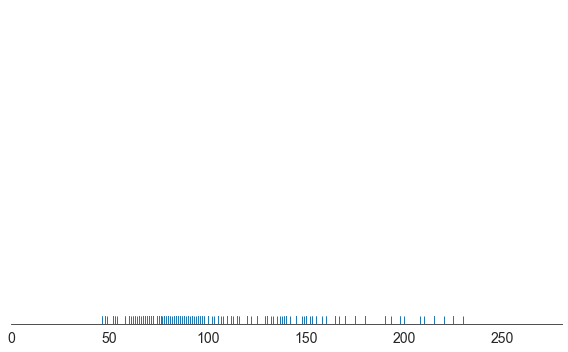

In [6]:
plt.figure(figsize=(8,5))
sns.distplot(hp, rug=True, kde=False, hist=False)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

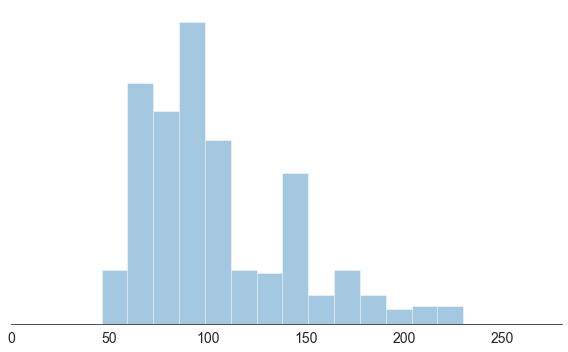

In [7]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde=False)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

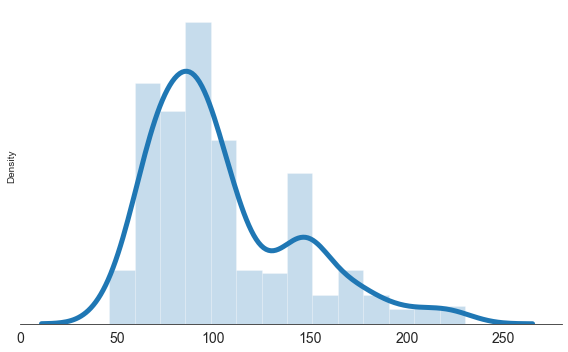

In [8]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

## "How It Works" Visuals

In [9]:
import numpy as np
import scipy.stats as stats

In [10]:
blue, orange, green, red = sns.color_palette()[:4]

In [11]:
pts = [1, 3, 3.5, 4, 6, 8]

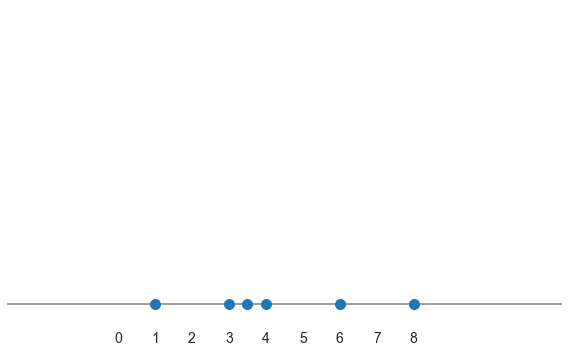

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, 1.5)
plt.xlim(-3, 12)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

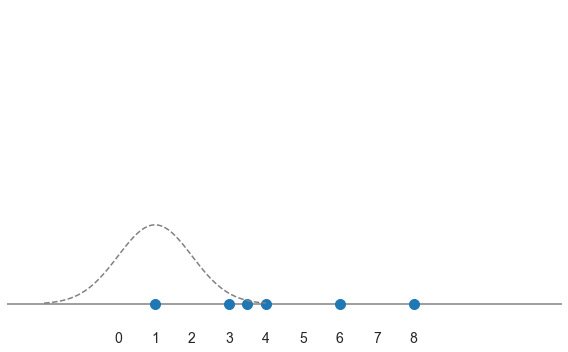

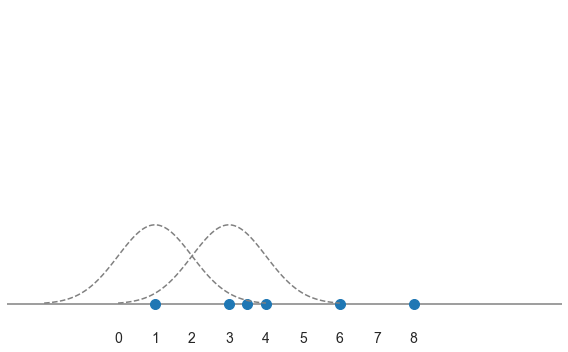

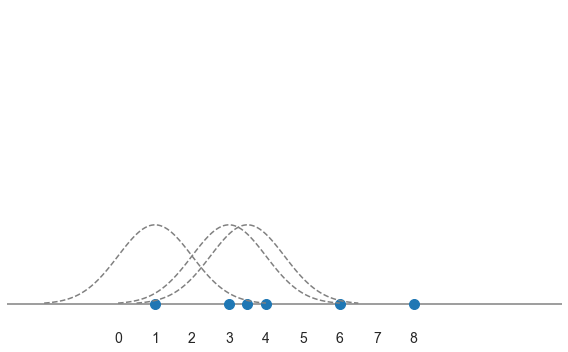

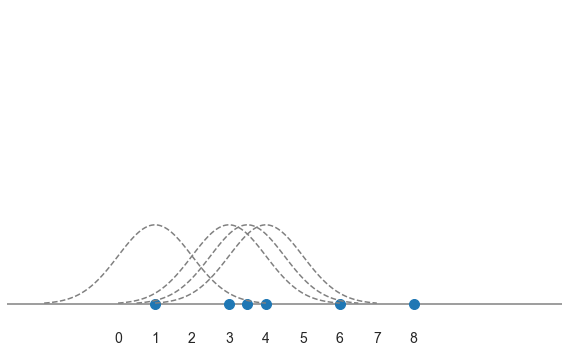

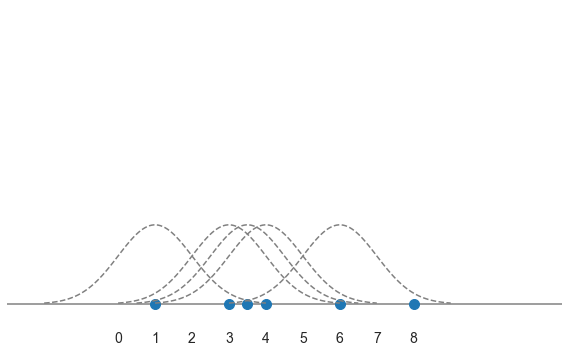

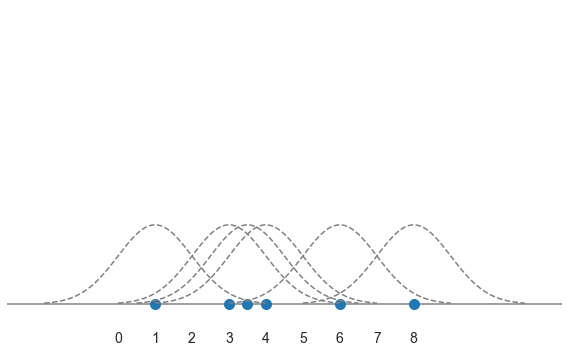

In [13]:
for i in range(len(pts)):
    plt.figure(figsize=(8, 5))
    for point in pts[0:i+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();
    #plt.savefig(f'02KDE_kernel{i}.svg');

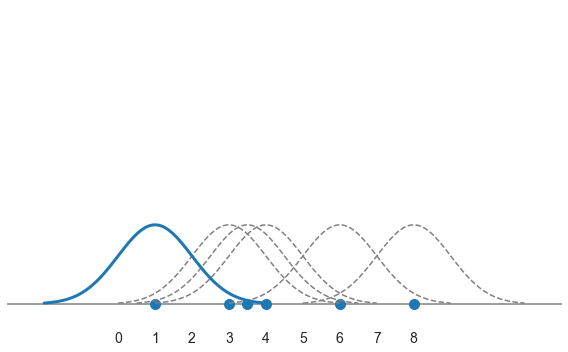

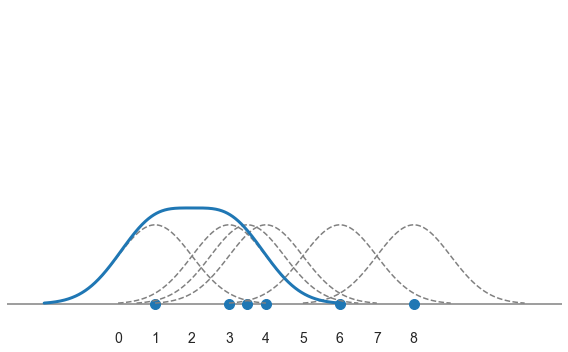

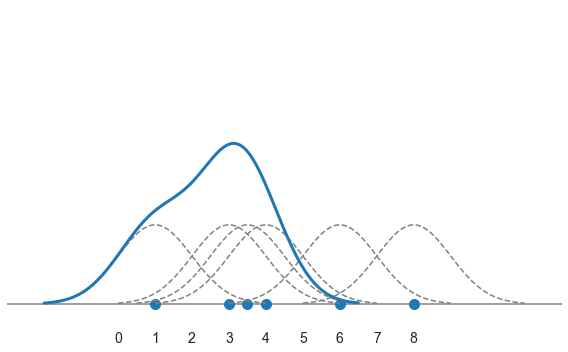

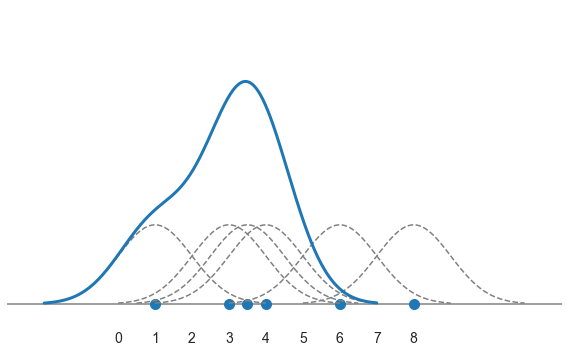

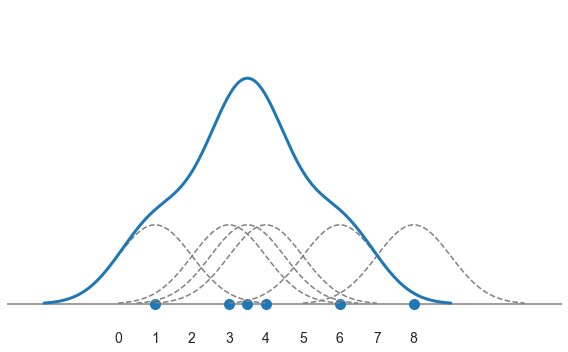

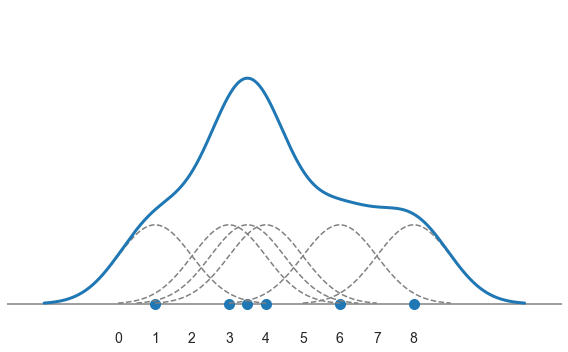

In [14]:
for i in range(1, len(pts)+1):
    plt.figure(figsize=(8, 5))
    for point in pts[0:len(pts)+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)

    total_x = np.linspace(pts[0] - 3*sigma, pts[i-1] + 3*sigma, 1000)
    total = sum([stats.norm.pdf(total_x, pts[j], sigma) for j in range(i)])
    plt.plot(total_x, total, color=blue, lw=3)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();
    #plt.savefig(f'02KDE_addkernel{i}.svg');

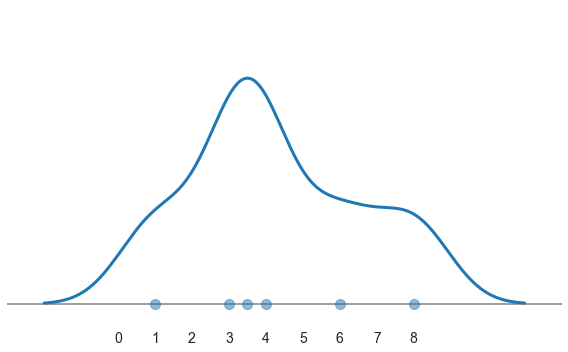

In [15]:
plt.figure(figsize=(8,5))
plt.plot(total_x, total, color=blue, lw=3)
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, alpha=0.5)
plt.axhline(0, color='gray', zorder=0)
plt.xlim(-3, 12)
plt.ylim(-0.1, 1.5)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

### Other Kernels

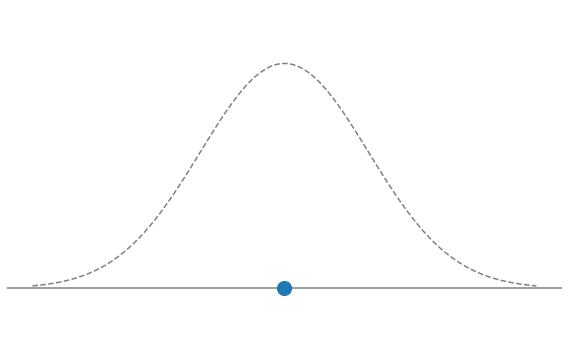

In [16]:
plt.figure(figsize=(8, 5))

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)

plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

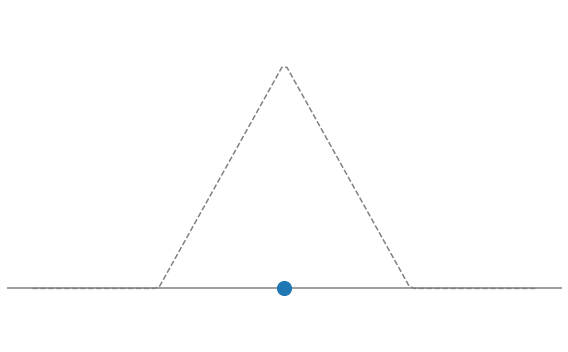

In [17]:
plt.figure(figsize=(8, 5))

def build_tri_kernel(x, center=0, sigma=1):
    m = 0.4/sigma
    if x < (center-sigma):
        return 0
    elif x < center:
        return m*x + m*(sigma-center)
    elif x < (center+sigma):
        return -m*x + m*(sigma + center)
    else:
        return 0  

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_tri_kernel(val, center=mu, sigma=1.5) for val in x], 
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

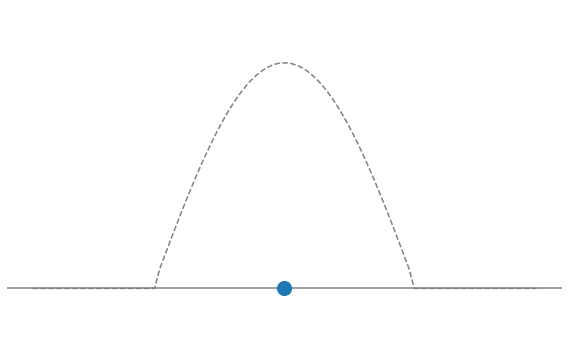

In [18]:
plt.figure(figsize=(8, 5))

def build_cos_kernel(x, center=0, sigma=1):
    if np.abs(x - center) < sigma:
        return 0.4*np.cos(x-center)
    else:
        return 0  

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_cos_kernel(val, center=mu, sigma=1.5) for val in x], 
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

## Univariate (1D)

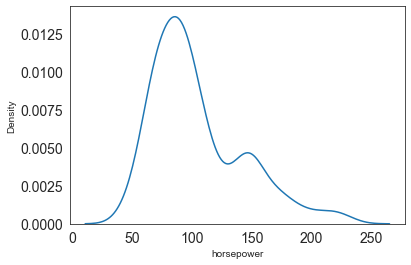

In [19]:
sns.kdeplot(cars.horsepower);

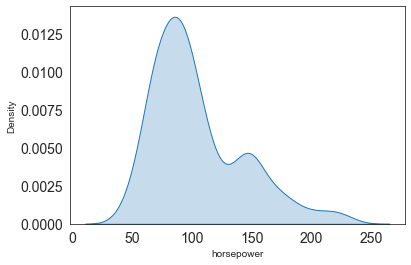

In [20]:
sns.kdeplot(cars.horsepower, shade=True);

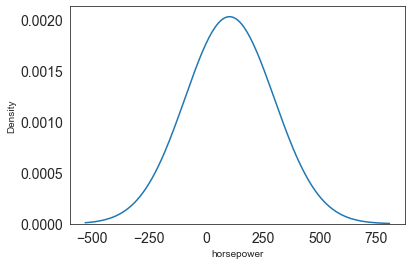

In [21]:
sns.kdeplot(cars.horsepower, bw=5);

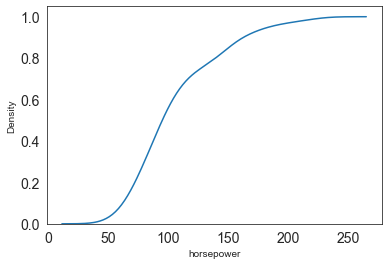

In [22]:
sns.kdeplot(cars.horsepower, cumulative=True);

### Bandwidth Widget

In [23]:
from ipywidgets import interact, interactive, HBox, VBox, interactive_output

from IPython.display import display

In [24]:
def bandwidth_widget(bw=10):
    sns.kdeplot(cars.horsepower, bw=bw, lw=3, shade=True)
    plt.xlim(-30, 300)
    plt.ylim(0, 0.03)

In [25]:
interactive(bandwidth_widget, bw=(1, 30, 1))

interactive(children=(IntSlider(value=10, description='bw', max=30, min=1), Output()), _dom_classes=('widget-i…

## Bivariate (2D)

### Bivariate Intro

In [26]:
sns.set_style('darkgrid')

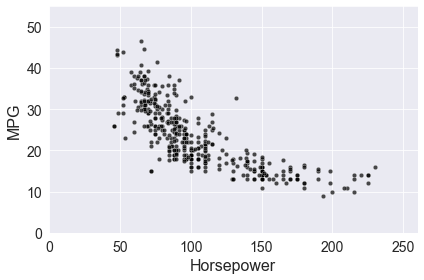

In [27]:
#sns.kdeplot(cars.horsepower, cars.mpg)
sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=16)
plt.ylabel('MPG', fontsize=16)
plt.tight_layout();

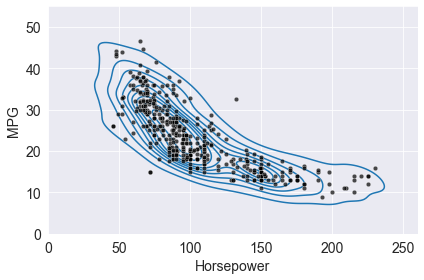

In [28]:
sns.kdeplot(cars.horsepower, cars.mpg)
sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20, zorder=10)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

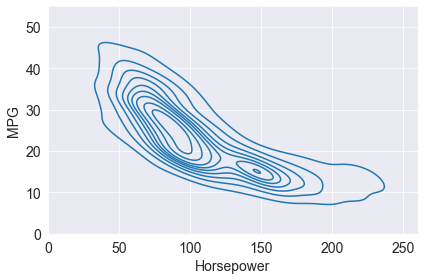

In [29]:
sns.kdeplot(cars.horsepower, cars.mpg)
#sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20, zorder=10)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

### Bivariate Demo

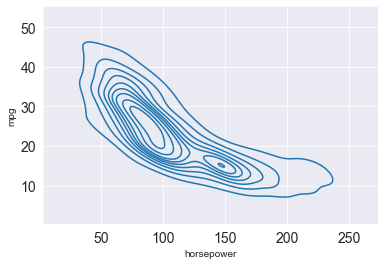

In [30]:
sns.kdeplot(cars.horsepower, cars.mpg);

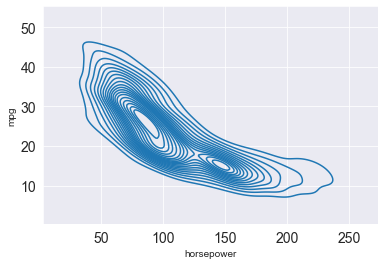

In [31]:
sns.kdeplot(cars.horsepower, cars.mpg, n_levels=20);

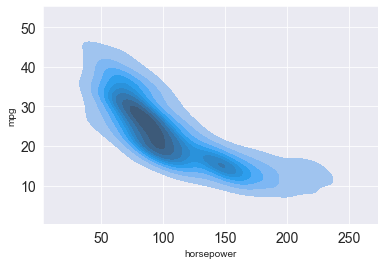

In [32]:
sns.kdeplot(cars.horsepower, cars.mpg, shade=True);

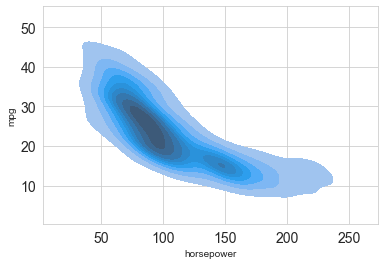

In [33]:
sns.set_style('whitegrid')

sns.kdeplot(cars.horsepower, cars.mpg, 
            shade=True,
            shade_lowest=False
           );

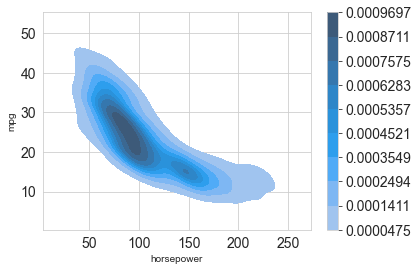

In [34]:
sns.kdeplot(cars.horsepower, cars.mpg, 
            shade=True, 
            shade_lowest=False,
            cbar=True
           );

## Bivariate KDEplot by Category

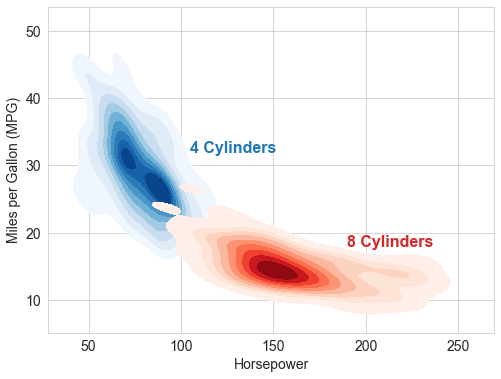

In [35]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

plt.annotate("4 Cylinders", (105, 32), color=blue, fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color=red, fontsize=16, fontweight='bold');

## Other Figures that use KDE

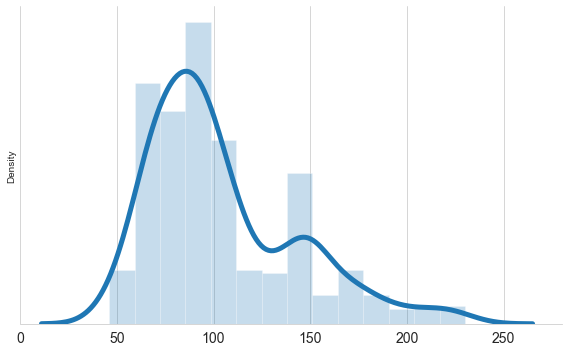

In [36]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

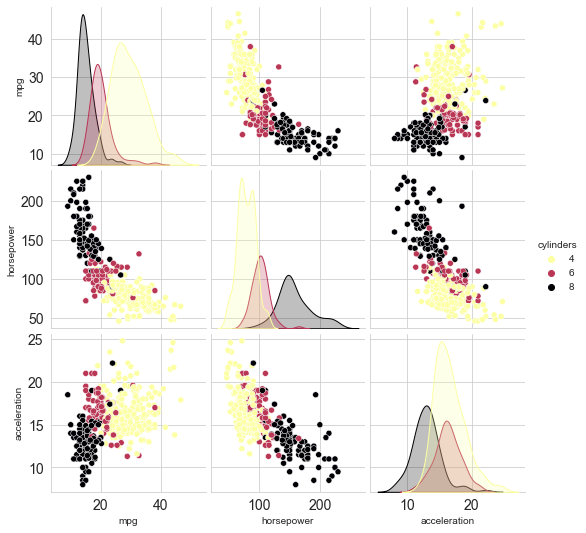

In [37]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='inferno_r'
            );